In [1]:
import pandas as pd

In [2]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: xlabel='date'>

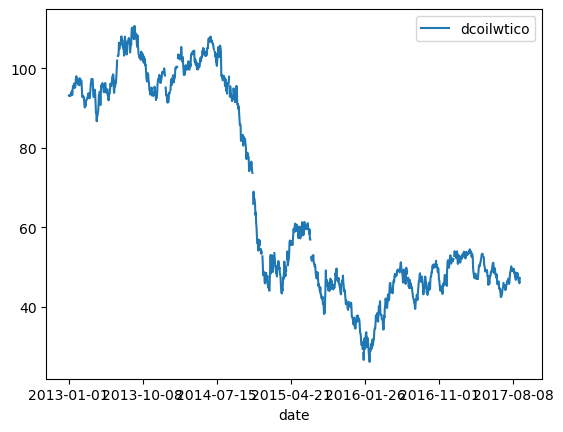

In [4]:
oil.set_index('date').plot()

In [5]:
oil.dtypes

date           object
dcoilwtico    float64
dtype: object

<Axes: xlabel='date'>

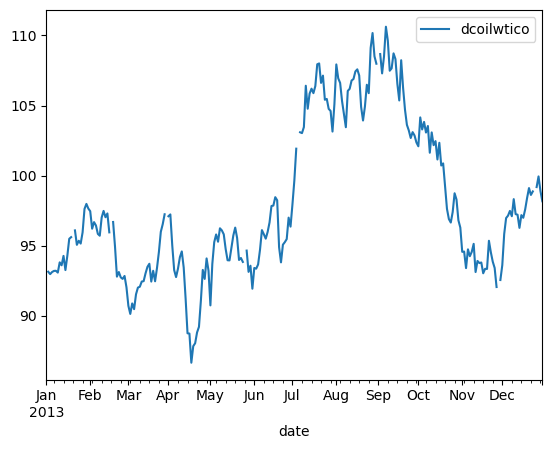

In [6]:
oil.astype({'date': 'datetime64[ns]'}).set_index('date').loc['2013'].plot()

In [7]:
oil = oil.astype({'date': 'datetime64[ns]'})


In [8]:
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [9]:
import seaborn as sns

In [10]:
sns.set_style('darkgrid')

In [11]:
oil = oil.rename(columns={'date':'Date','dcoilwtico': 'Oil Price'})

In [12]:
oil

,Date,Oil Price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


<Axes: title={'center': 'Oil Price 2013 - 2017'}, xlabel='Date', ylabel='USD Price'>

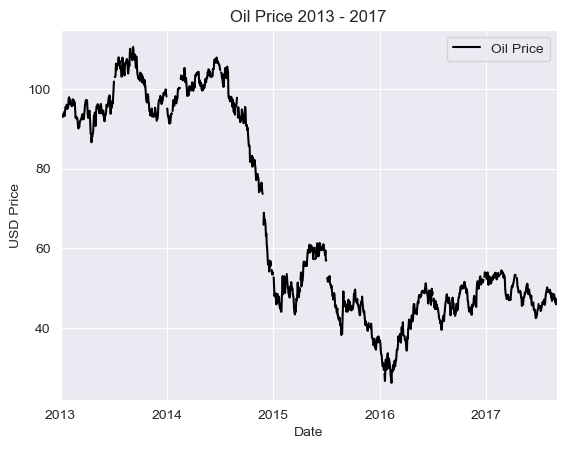

In [13]:
oil.set_index('Date').plot(
    title='Oil Price 2013 - 2017',
    ylabel='USD Price',
    xlabel='Date',
    color='Black'
)

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [14]:
transactions = pd.read_csv("../retail/transactions.csv")

In [15]:
transactions = transactions.astype({'date': 'datetime64[ns]'})

In [18]:
stores_1234 = (
    transactions
    .query('store_nbr in [1,2,3,4]')
    .pivot_table(
        index='date',
        columns='store_nbr',
        values='transactions',
        aggfunc='sum'
    )
)

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

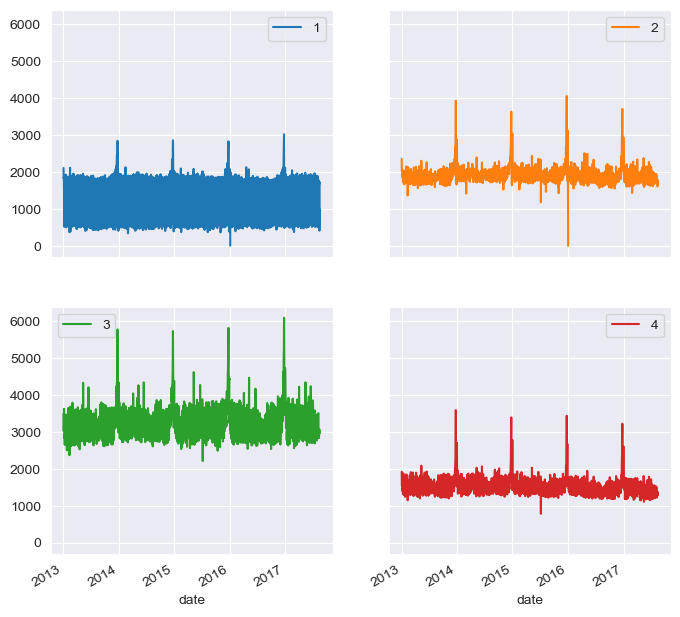

In [16]:
(
    transactions
    .query('store_nbr in [1,2,3,4]')
    .pivot_table(
        index='date',
        columns='store_nbr',
        values='transactions',
        aggfunc='sum'
    )
    .plot(
        subplots=True,
        layout=(2,2),
        figsize=(8,8),
        sharey=True
    )
)


# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

<Axes: xlabel='store_nbr'>

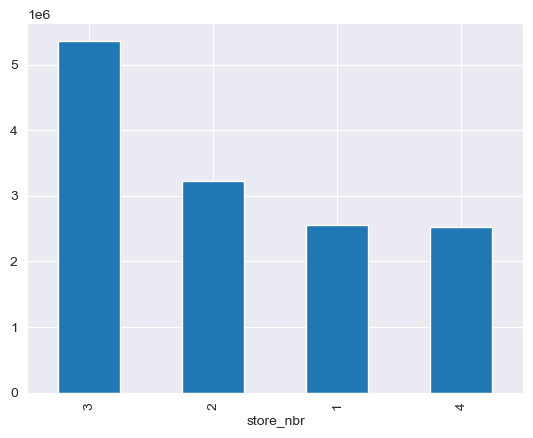

In [55]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234.sum().sort_values(ascending=False).plot.bar(legend=False)

In [23]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.

store_1234_monthly = stores_1234.groupby(stores_1234.index.month).sum()

<Axes: ylabel='date'>

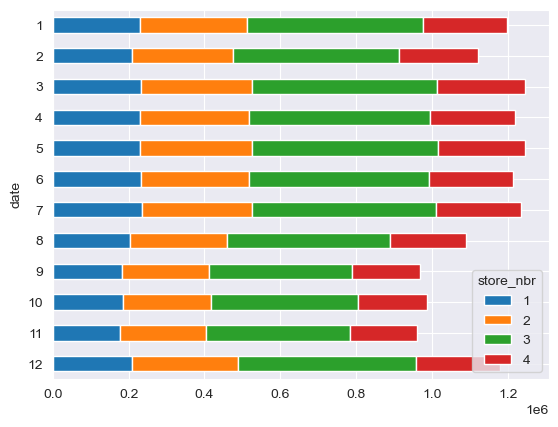

In [54]:
store_1234_monthly.sort_values('date',ascending=False).plot.barh(
    stacked=True
)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [ ]:
stores_1234.head()

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [ ]:
stores_1234.head()